<h1><center><font size=9>Breast Cancer Prediction</center></font></h1>   

<br/>
<font color = "brown" size = 5>Objective</font>


Breast cancer is a prevalent and potentially life-threatening disease that affects millions of individuals globally. Early detection and accurate diagnosis play a crucial role in improving patient outcomes. In this context, our goal is to develop a robust predictive model for classifying breast tumors as malignant or benign based on a set of features extracted from diagnostic tests.



<br/>
<font color = "brown" size = 5>About the dataset</font>

* id: Unique identifier for each patient.

* diagnosis: The target variable indicating whether the tumor is 'M' (Malignant) or 'B' (Benign).

* radius_mean: Mean of distances from the center to points on the perimeter of the tumor.

* texture_mean: Standard deviation of gray-scale values for the pixels in the tumor.

* perimeter_mean: Mean size of the core tumor.

* area_mean: Mean area of the tumor.

* smoothness_mean: Mean smoothness of the tumor boundary, representing local variations in radius lengths.

* compactness_mean: Mean of the perimeter squared divided by the area - 1.0.

* concavity_mean: Mean severity of concave portions of the contour.

* concave_points_mean: Mean number of concave portions of the contour.

* symmetry_mean: Mean symmetry of the tumor.

* fractal_dimension_mean: Mean "coastline approximation" - 1.

* radius_se: Standard error of the distances from the center to points on the perimeter.

* texture_se: Standard error of gray-scale values.

* perimeter_se: Standard error of the size of the core tumor.

* area_se: Standard error of the area of the tumor.

* smoothness_se: Standard error of the smoothness of the tumor boundary.

* compactness_se: Standard error of the perimeter squared divided by the area - 1.0.

* concavity_se: Standard error of the severity of concave portions of the contour.

* concave_points_se: Standard error for the number of concave portions of the contour.

* symmetry_se: Standard error of symmetry.

* fractal_dimension_se: Standard error of the "coastline approximation" - 1.

* radius_worst: "Worst" or largest mean value for the radius.

* texture_worst: "Worst" or largest mean value for texture.

* perimeter_worst: "Worst" or largest mean value for perimeter.

* area_worst: "Worst" or largest mean value for area.

* smoothness_worst: "Worst" or largest mean value for smoothness of the tumor boundary.

* compactness_worst: "Worst" or largest mean value for the perimeter squared divided by the area - 1.0.

* concavity_worst: "Worst" or largest mean value for the severity of concave portions of the contour.

* concave_points_worst: "Worst" or largest mean value for the number of concave portions of the contour.

* symmetry_worst: "Worst" or largest mean value for symmetry.

* fractal_dimension_worst: "Worst" or largest mean value for the "coastline approximation" - 1.

In [42]:
#importing libraries i needed!!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Evaluation and comparision of all the models


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score

from sklearn.metrics import precision_recall_curve,roc_curve
import warnings 
warnings.filterwarnings("ignore")

In [4]:
#Loading dataset 
data=pd.read_csv("C:\\Users\\ADMIN\\Downloads\\data.csv")
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [5]:
#Here we make copy of original dataset
df=data.copy()
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [6]:
#checking the shape of data
df.shape

(569, 32)

In [7]:
## columns shows all columns in dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
#First Five Rows Disply
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [9]:
#Tail Five Rows Disply
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [10]:
#Checking null values in dataset
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# info() function gives datatypes of dataframe variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
#View Statistical summary of dataset
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave_points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave_points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave_points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave_points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave_points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

In [13]:
df.describe(include='object').T

count unique top freq
diagnosis   569      2   B  357

In [14]:
#See unique values in dignosis
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

#there are two categories M=MALIGTANT,B=BENIGN

In [15]:
#Count number number of entries in dignosis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Clean and prepare the data

In [16]:
#Dropping id coloumn which is not needed.
df.drop(['id'], axis=1, inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

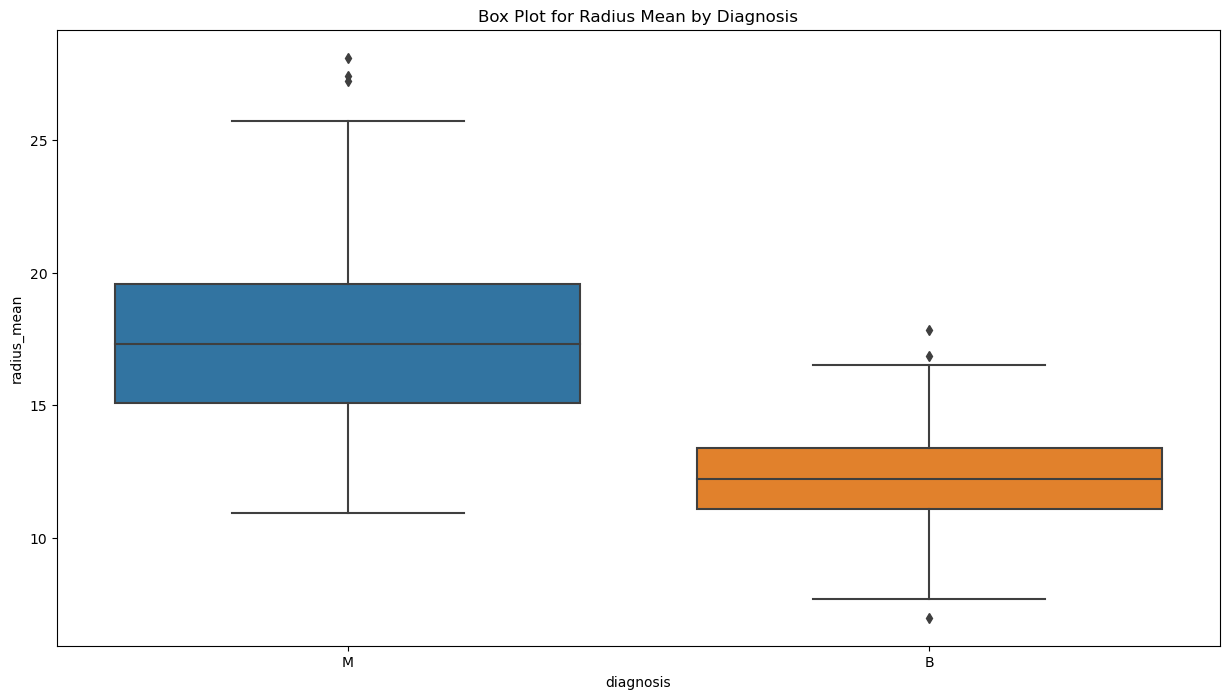

In [19]:
#Make boxplot to see outliers in diagnosis
plt.figure(figsize=(15, 8))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Box Plot for Radius Mean by Diagnosis')
plt.show()

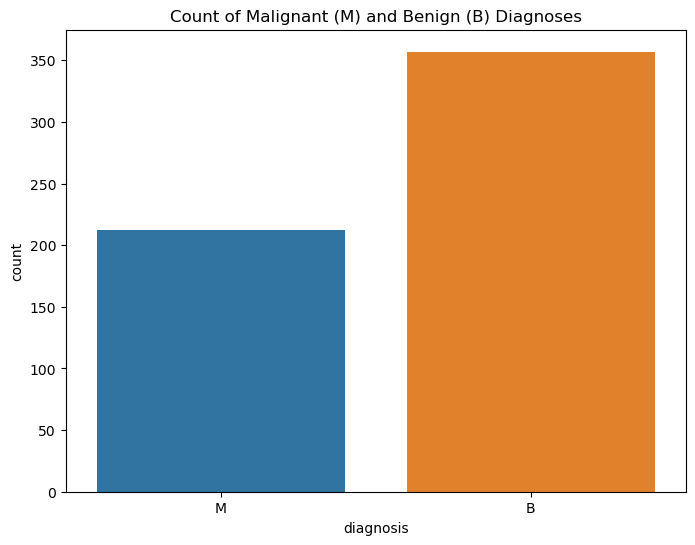

In [20]:
# Make a count plot for the counting two different categories-malignant and benign 
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Count of Malignant (M) and Benign (B) Diagnoses')
plt.show()

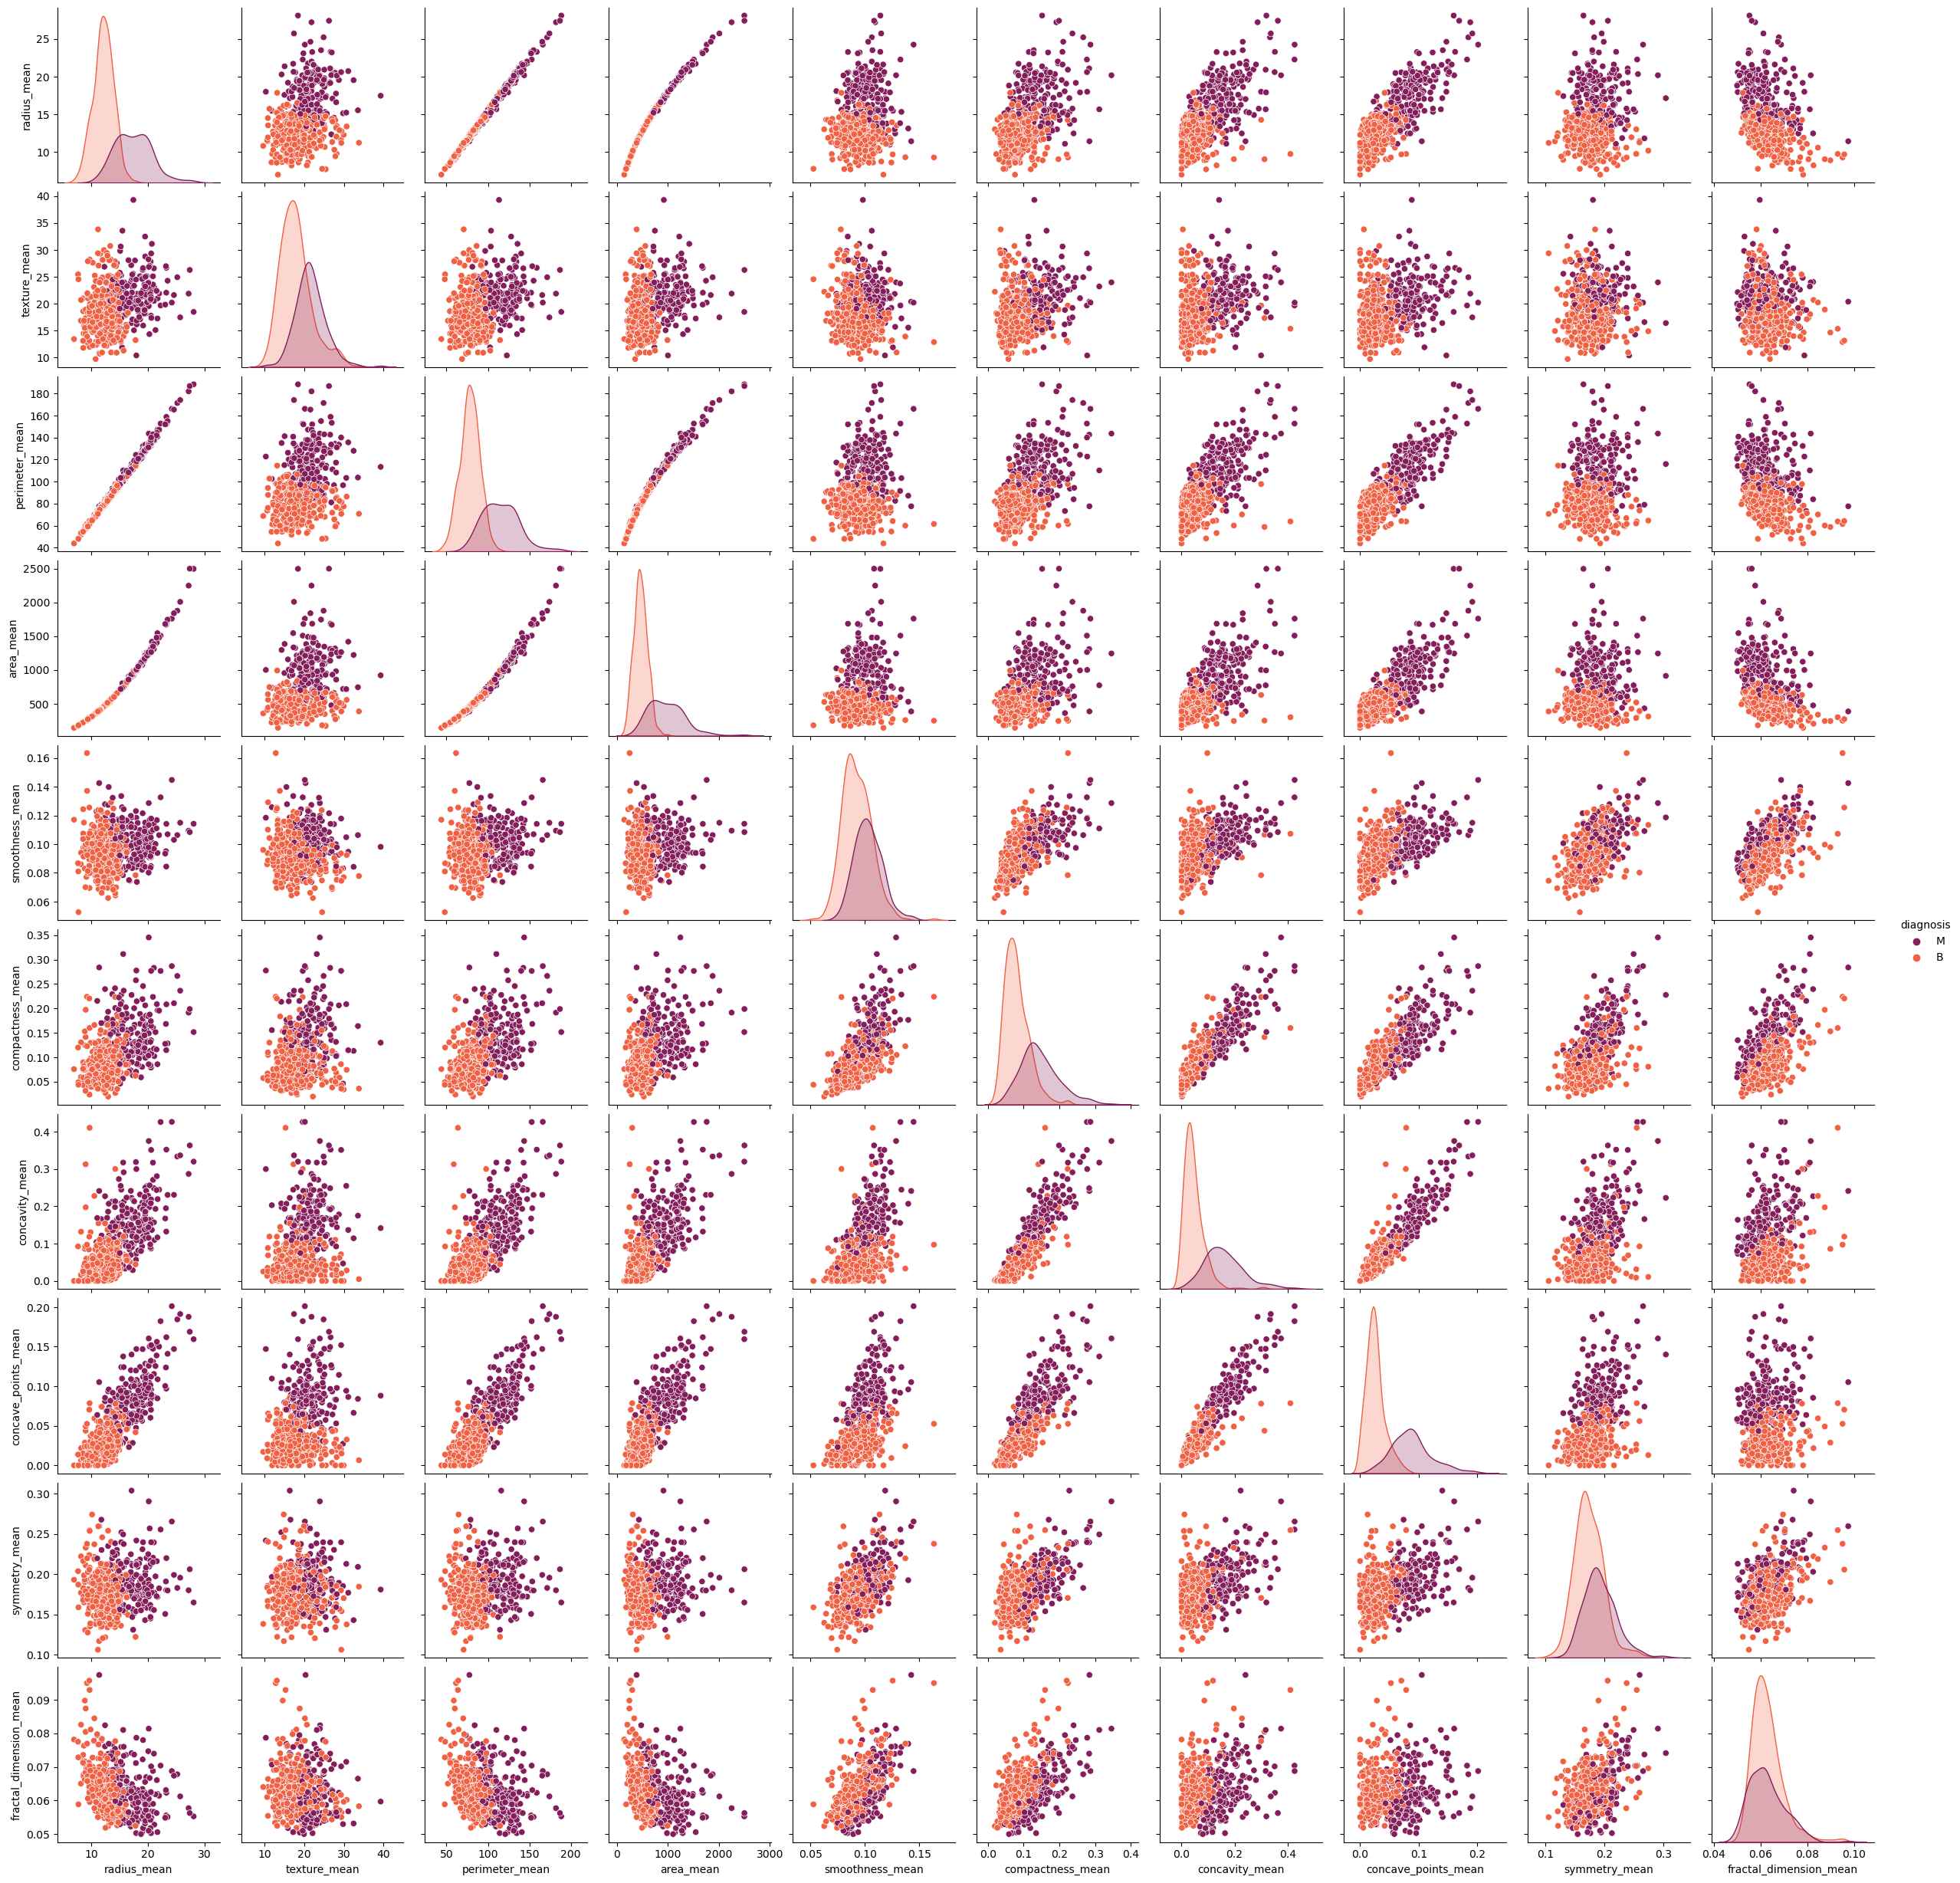

In [21]:
# Select specific columns
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
        'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 
        'fractal_dimension_mean']
sns.pairplot(data=df[cols], hue='diagnosis',palette='rocket')


# Checking for the correlation

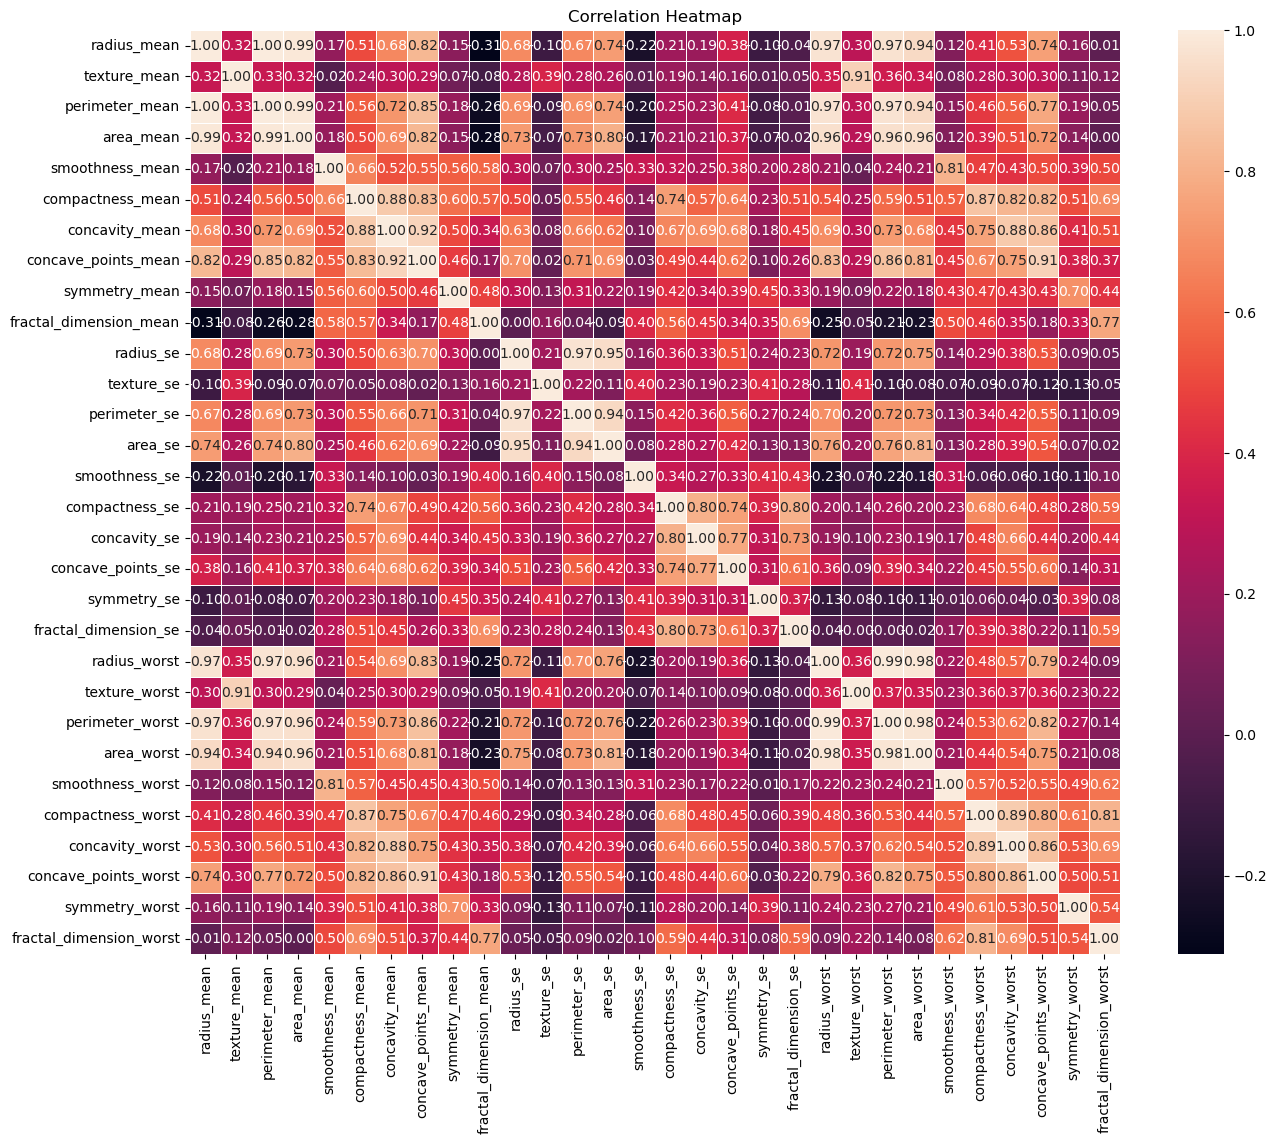

In [22]:
#Create corelation matrix to visulize relationship between independant variable
correlation_matrix = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Highly correlated pairs

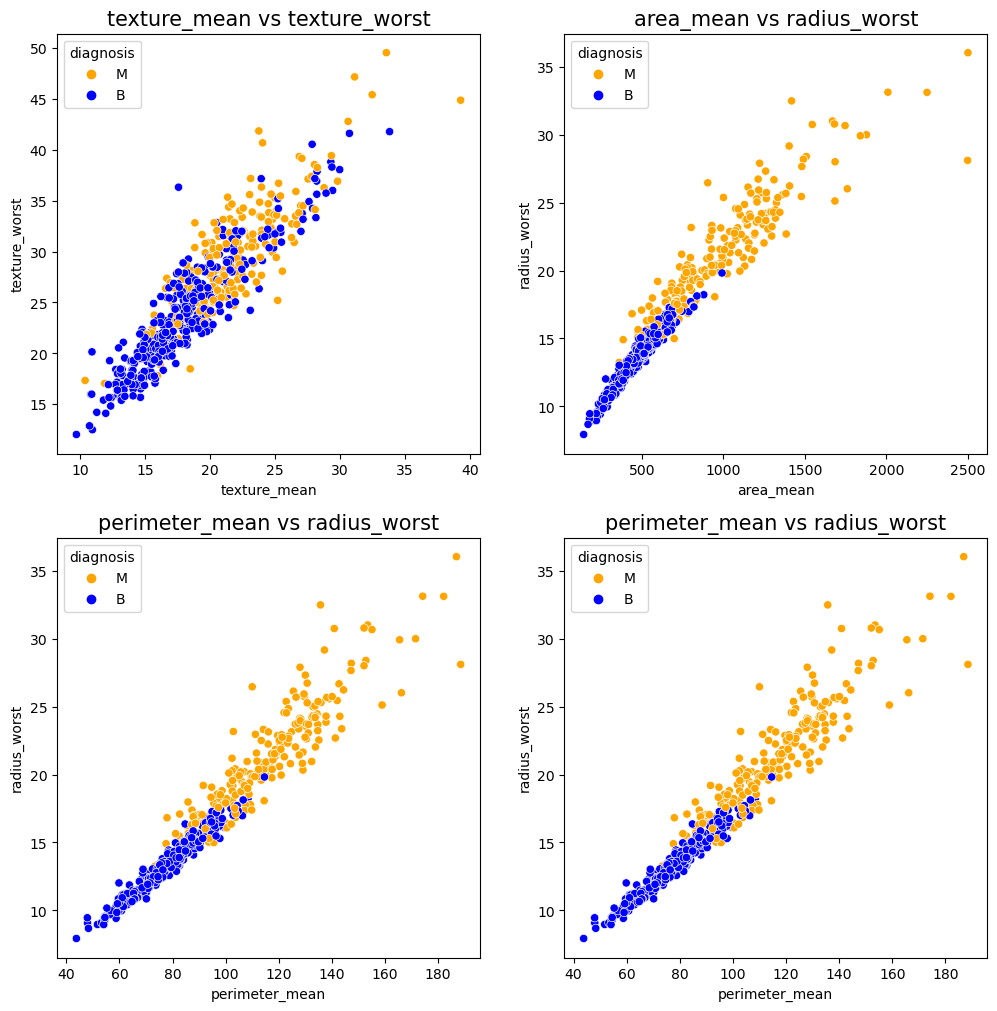

In [23]:
palette ={'B' : 'blue', 'M' : 'orange'}


fig = plt.figure(figsize=(12,12))
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette)
    plt.title(a + ' vs ' + b,fontsize=15)
    
plot_scatter('texture_mean','texture_worst',221) 
plot_scatter('area_mean','radius_worst',222) 
plot_scatter('perimeter_mean','radius_worst',223)  
plot_scatter('perimeter_mean','radius_worst',224) 

# Inverse correlated pairs

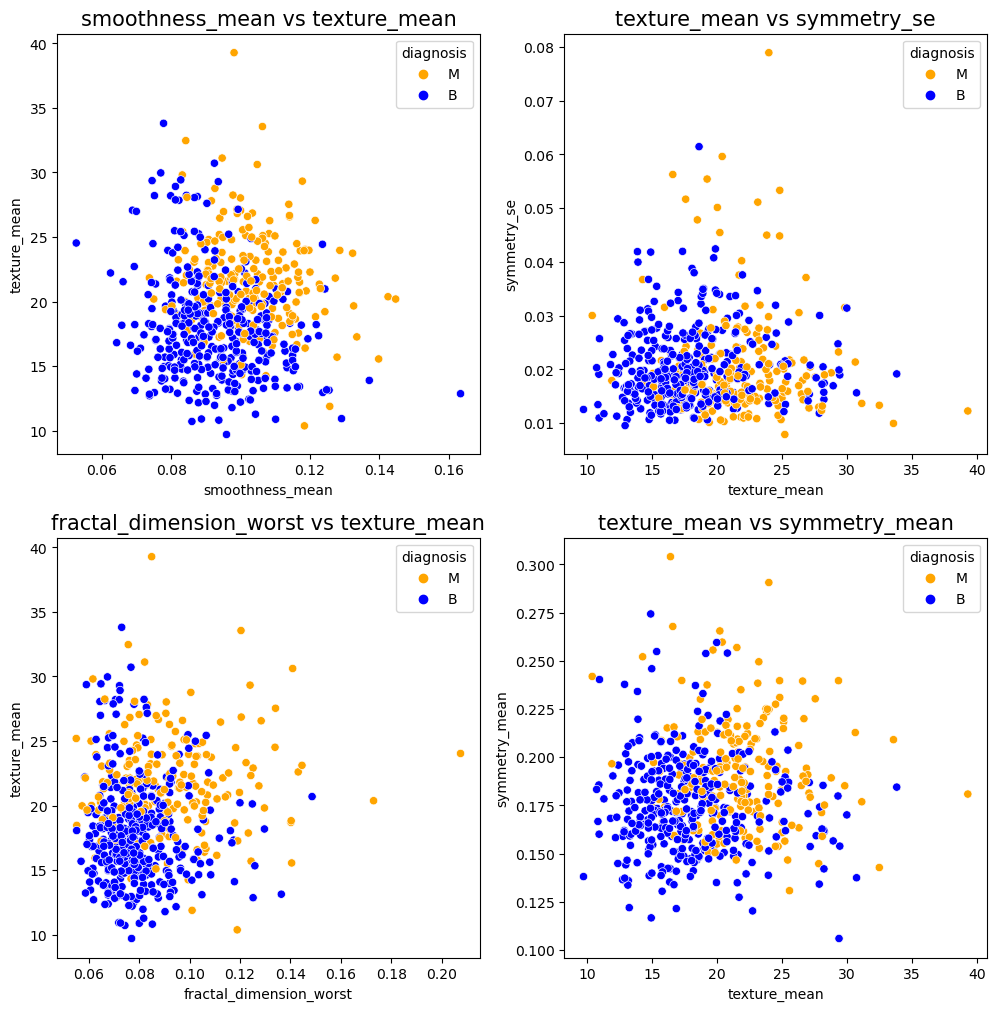

In [24]:
fig = plt.figure(figsize=(12,12))

  
plot_scatter('smoothness_mean','texture_mean',221) 
plot_scatter('texture_mean','symmetry_se',222) 
plot_scatter('fractal_dimension_worst','texture_mean',223) 
plot_scatter('texture_mean','symmetry_mean',224)

# Low correlated pairs

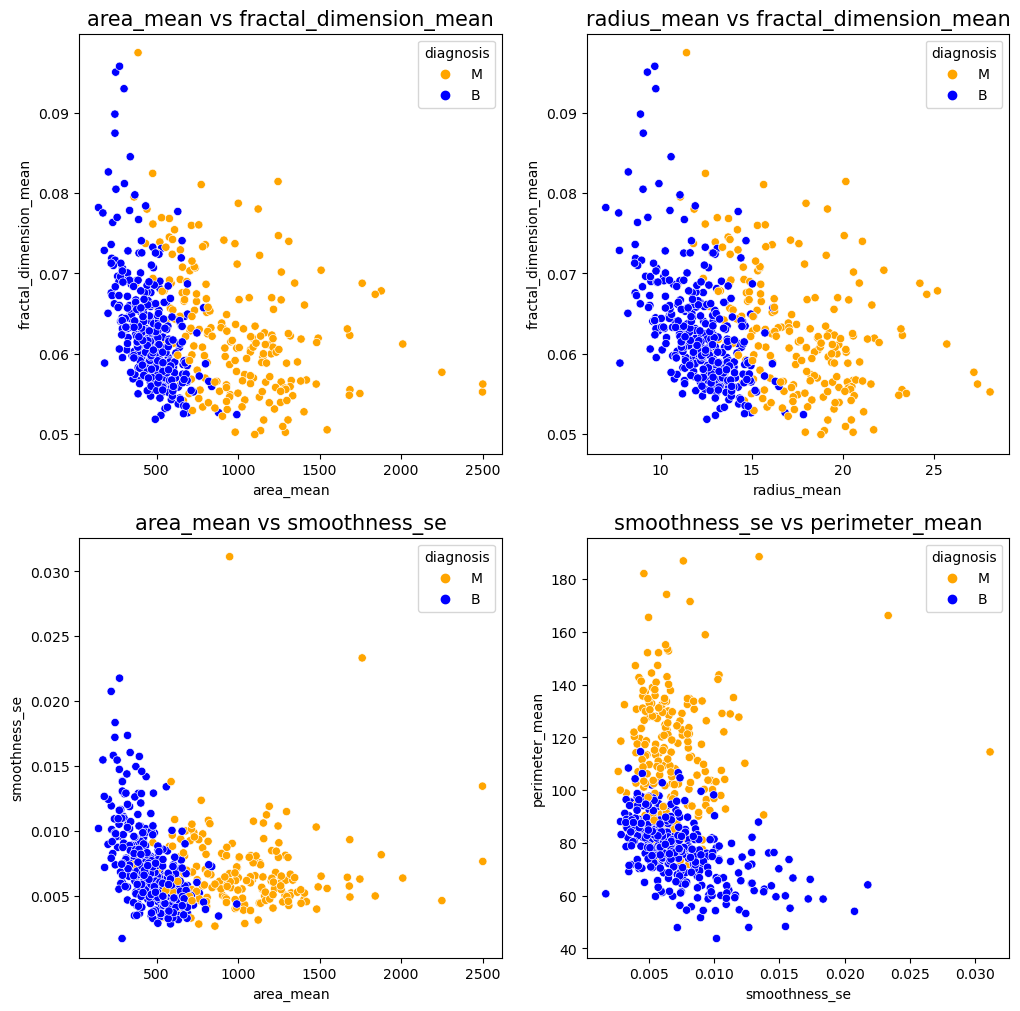

In [25]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

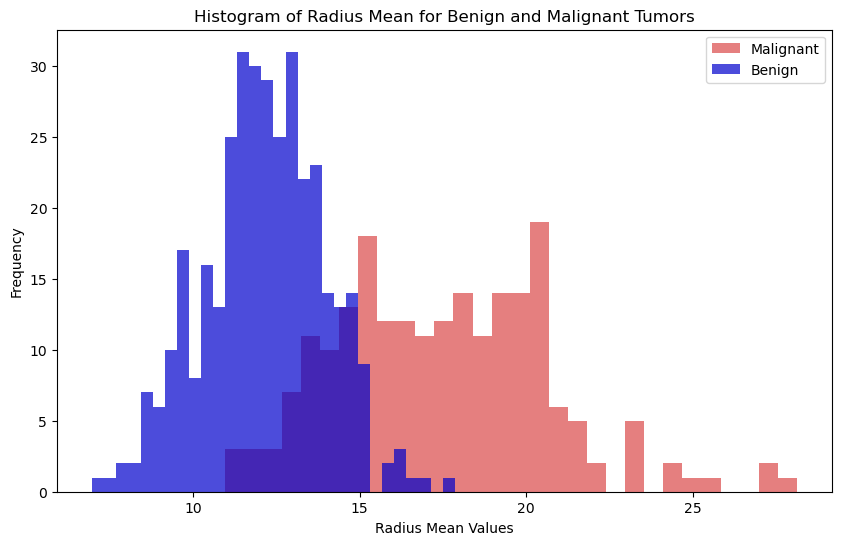

In [26]:
# Specify colors for plotting
color_malignant = (0.8, 0, 0, 0.5)  # Reddish color for Malignant tumors
color_benign = (0, 0, 0.8, 0.5)      # Bluish color for Benign tumors

# Plot histograms
plt.figure(figsize=(10, 6))

# Plot Malignant tumors
plt.hist(df[df["diagnosis"] == "M"].radius_mean, bins=30, color=color_malignant, label="Malignant")

# Plot Benign tumors
plt.hist(df[df["diagnosis"] == "B"].radius_mean, bins=30, color=color_benign, label="Benign", alpha=0.7)

# Add labels and legend
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Benign and Malignant Tumors")

# Show the plot
plt.show()

In [27]:
df


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [28]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder

LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

In [29]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

# Modeling


In [30]:


x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

In [32]:
# Initialize SVM model
svm_model = SVC(kernel='linear')

In [33]:
# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
# Predictions on the test set
y_pred = svm_model.predict(X_test)

# Confusion Matrix

In [35]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])

confusion_mat

predicted_cancer  predicted_healthy
cancer                 41                  2
healthy                 3                 68

<Axes: >

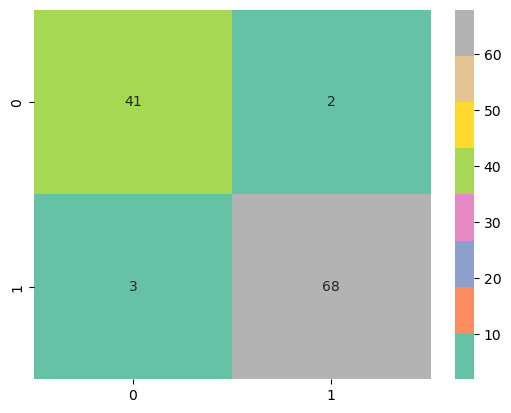

In [36]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Set2')

### As we can see from the table above:

* True Positive(TP) : Values that the model predicted as yes(Healthy), and is actually yes(Healthy).
* True Negative(TN) : Values that the model predicted as not(Cancer), and is actually no(Cancer).
* False Positive(FP): Values that the model predicted as yes(Healthy), but actually no(Cancer).
* False Negative(FN): Values that the model predicted as no (Cancer), but actually yes(Healthy).
* For this dataset, whenever the model is predicting something as yes, it indicates Absence of cancer cells (Healthy) and for cases when the model predicting no; it indicates existence of cancer cells(Cancer).


In [37]:
print(accuracy_score(y_test, y_pred))

0.956140350877193


In [38]:
print(precision_score(y_test, y_pred))

0.9318181818181818


In [39]:
print(recall_score(y_test, y_pred))

0.9534883720930233


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114




* True Positive (TP): 71
* These are the instances where the model correctly predicted the positive class (malignant).


* True Negative (TN): 41
* These are the instances where the model correctly predicted the negative class (benign).

* False Positive (FP): 2
* These are the instances where the model incorrectly predicted the positive class (malignant) when the actual class was negative (benign).

* False Negative (FN): 3
* These are the instances where the model incorrectly predicted the negative class (benign) when the actual class was positive (malignant).


### calculate True Positive Rate (TPR) and False Positive Rate (FPR) using the information you provided:

* True Positive Rate/Recall/Sensitivity: How often the model predicts yes(Healthy) when it's actually yes(Healthy)?
* True Positive Rate(TPR) = TP/TP+FP = 71/(71+3) = 0.959


# ---------------------------------------------------------------------------------------------------------------



* False Positive Rate: How often the model predicts yes(Healthy) when it's actually no(Cancer)?
* False Positive Rate(FPR) = FP/FP+TN = 2/2+41 = 0.47

## ROC curve

ROC AUC: 0.9963969865705863


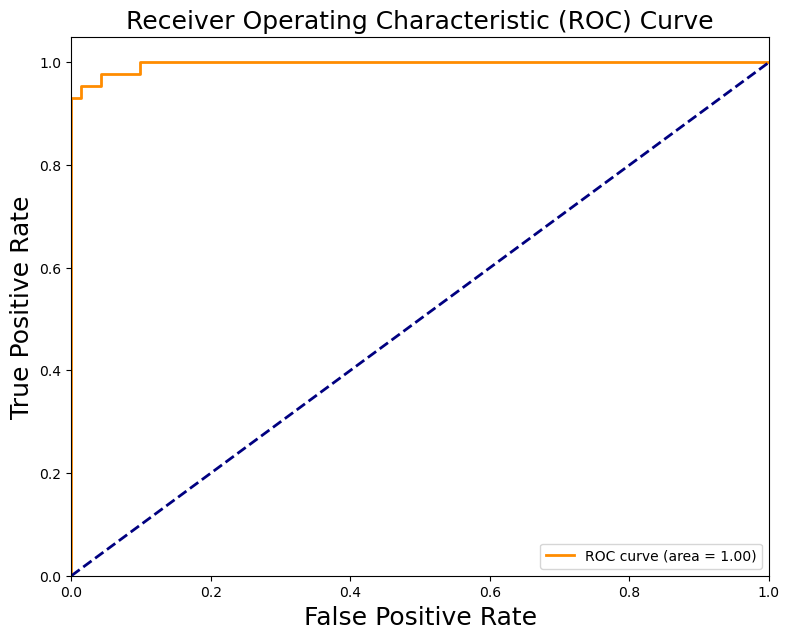

In [200]:
# Get decision function scores
y_score = svm_model.decision_function(X_test)

# Calculate ROC curve and AUC
FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print("ROC AUC:", ROC_AUC)

# Plot ROC curve with color changes
plt.figure(figsize=[9, 7])
plt.plot(FPR, TPR, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % ROC_AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

* The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). As we notice the svc Classifier give a curve closer to the top-left corner so it indicate a better performance.

## Area Under Curve

* Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve using scikit-learn, you can use the roc_auc_score function

* AUC =0.05=poor performace

* AUC=1=Best performance

In [199]:
roc_auc_score(y_test, y_score)

0.9963969865705863